In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision.transforms as transforms



In [4]:
def confusion(Y, Y_predict):
    L = len(Y)
    CM = np.zeros([10,10])
    for i in range(10):
        for j in range(10):
            temp = 0
            for p in range(L):
                    
                if Y[p] == i and Y_predict[p] == j:
                    temp = temp + 1
            CM[i,j] = temp
    CM = CM.astype(int)
    
    return CM

In [5]:
def accuracy(Y, Y_predict):
    CM = confusion(Y, Y_predict)
    temp1 = 0
    temp2 = 0
    for i in range(10):
        temp1 = temp1 + CM[i,i]
        for j in range(10):
            temp2 = temp2 + CM[i,j] 
    accuracy = temp1/temp2       
    return accuracy 

In [6]:
# Load data
dataset = pd.read_csv("fashion-mnist.csv")
npdataset = dataset.to_numpy()
#print(dataset.head(2))
#print(np.shape(dataset))
X = npdataset[:, 0:784]
Y = npdataset[:, 784]

In [7]:
# Split data
Xs, X_rem, Ys, Y_rem = train_test_split(X,Y, train_size = 0.5)
Xv, Xt, Yv, Yt = train_test_split(X_rem,Y_rem, train_size = 0.7)

print(np.shape(Xs))
print(np.shape(Xv))
print(np.shape(Xt))

(5000, 784)
(3500, 784)
(1500, 784)


#  SVM Algorithm With Linear Kernel

In [8]:
clf = svm.SVC(kernel ='linear', C = 1)      # Build classifier
clf.fit(Xs, Ys)                             # Learn classifier with S (train data set)
Yv_SVM_LK = clf.predict(Xv)
Yt_SVM_LK = clf.predict(Xt)

In [9]:
print('Confusion matrix for validation dataset using SVM algorithm with linear kernel:')
print(confusion(Yv,Yv_SVM_LK),'\n')
#print(confusion_matrix(Yv,Yv_SVM_LK))
print('Accuracy for validation dataset using SVM algorithm with linear kernel:')
print(accuracy(Yv,Yv_SVM_LK),'\n')
#print(classification_report(Yv,Yv_SVM_LK))
#print(acc(confusion_matrix(Yv,Yv_SVM_LK)))
print('Confusion matrix for test dataset using SVM algorithm with linear kernel:')
print(confusion(Yt,Yt_SVM_LK),'\n')
print('Accuracy for test dataset using SVM algorithm with linear kernel:')
print(accuracy(Yt,Yt_SVM_LK),'\n')

Confusion matrix for validation dataset using SVM algorithm with linear kernel:
[[281   1   8  14   2   0  41   0   5   0]
 [  2 328   0   8   2   0   1   0   0   0]
 [ 11   3 250   4  51   0  45   0   5   0]
 [ 30   5   2 284   8   0   9   0   1   0]
 [  3   1  69  12 264   0  38   0   0   0]
 [  0   1   0   0   0 266   0  24   3  12]
 [ 66   3  50   7  44   0 153   0   9   0]
 [  0   0   0   0   0  15   0 314   1  25]
 [  5   1   2   1   1   2   4   1 340   0]
 [  0   0   0   0   0   2   0  16   0 344]] 

Accuracy for validation dataset using SVM algorithm with linear kernel:
0.8068571428571428 

Confusion matrix for test dataset using SVM algorithm with linear kernel:
[[121   1   3   2   1   0  14   0   1   0]
 [  3 152   0   1   0   0   0   0   1   0]
 [  7   1 111   0  12   0  20   0   1   0]
 [ 19   4   2 124   5   0   7   0   1   0]
 [  4   0  14   7  93   0  12   0   0   0]
 [  0   0   0   0   0 132   0   7   0   6]
 [ 27   0  23   6  17   0  81   0   3   0]
 [  0   0   0   0  

# SVM Algorithm With Gaussian Kernel

In [12]:
n_features = 784
default_gamma = 1 / (n_features * Xs.var())
print(default_gamma)

1.5964761551357707e-07


In [22]:
SVM_GK_accuracy = []
for k in range(30):
    clf_SVM_GK = svm.SVC(kernel = 'rbf', gamma = (14.5 + k/10) * 10 ** (-8))  
    clf_SVM_GK.fit(Xs, Ys)
    Yv_SVM_GK = clf_SVM_GK.predict(Xv)
    SVM_GK_accuracy.append(accuracy(Yv, Yv_SVM_GK)) 

The optimal value of gamma is 1.67e-07


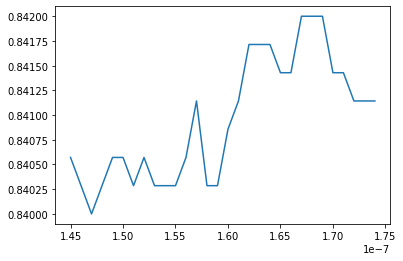

In [23]:
plt.plot((np.arange(30)/10 + 14.5) * 10 ** (-8), SVM_GK_accuracy)
best_gamma =(14.5 + (np.argmax(SVM_GK_accuracy) )/10 ) * 10 ** (-8)
print('The optimal value of gamma is', best_gamma)

In [24]:
clf_SVM_GK = svm.SVC(kernel = 'rbf', gamma = best_gamma)
clf_SVM_GK.fit(Xs, Ys)
Yv_SVM_GK = clf_SVM_GK.predict(Xv)
Yt_SVM_GK = clf_SVM_GK.predict(Xt)

In [25]:
print('Confusion matrix for validation dataset using SVM algorithm with Gaussian kernel:')
print(confusion(Yv,Yv_SVM_GK),'\n')
print('Accuracy for validation dataset using SVM algorithm with Gaussian kernel:')
print(accuracy(Yv,Yv_SVM_GK),'\n')
print('Confusion matrix for test dataset using SVM algorithm with Gaussian kernel:')
print(confusion(Yt,Yt_SVM_GK),'\n')
print('Accuracy for test dataset using SVM algorithm with Gaussian kernel:')
print(accuracy(Yt,Yt_SVM_GK),'\n')

Confusion matrix for validation dataset using SVM algorithm with Gaussian kernel:
[[293   0   6  21   0   0  28   0   4   0]
 [  3 321   2  13   0   0   2   0   0   0]
 [  4   0 276   7  48   0  32   0   2   0]
 [ 23   0   2 295   9   0   9   0   1   0]
 [  0   1  37  12 296   0  40   0   1   0]
 [  0   0   0   0   0 275   0  18   3  10]
 [ 67   0  43   7  29   0 180   0   6   0]
 [  0   0   0   0   0   9   0 323   0  23]
 [  3   0   4   2   1   0   3   3 341   0]
 [  0   0   0   0   0   1   0  14   0 347]] 

Accuracy for validation dataset using SVM algorithm with Gaussian kernel:
0.842 

Confusion matrix for test dataset using SVM algorithm with Gaussian kernel:
[[126   0   3   4   1   0   7   0   2   0]
 [  2 151   0   3   0   0   0   0   1   0]
 [  4   0 121   0  10   1  14   0   2   0]
 [ 13   0   0 141   5   0   3   0   0   0]
 [  0   0  10   8 101   0  11   0   0   0]
 [  0   0   0   0   0 134   0   5   0   6]
 [ 32   0  13   4  15   0  91   0   2   0]
 [  0   0   0   0   0   3 

# K-Nearest-Neighbor Algorithm

In [26]:
# sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNN_accuracy = []
for k in range(1, 50):
    clf_KNN = KNeighborsClassifier(n_neighbors = k) #Instance generation.
    clf_KNN.fit(Xs, Ys)                       #Model creation execution
    Yv_KNN = clf_KNN.predict(Xv)                    #Predictive execution
    KNN_accuracy.append(accuracy(Yv, Yv_KNN)) #Precision storage

The optimal value of K is 2


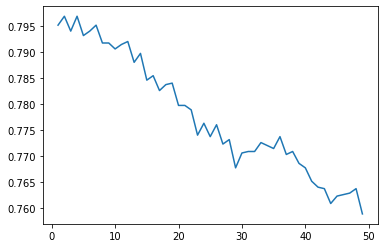

In [30]:
plt.plot(np.arange(49) + 1, KNN_accuracy)
best_n_neighbors = np.argmax(KNN_accuracy) + 1
print('The optimal value of K is', best_n_neighbors)

In [28]:
clf_KNN = KNeighborsClassifier(n_neighbors = best_n_neighbors) #Instance generation.
clf_KNN.fit(Xs, Ys)                       #Model creation execution
Yv_KNN = clf_KNN.predict(Xv)                    #Predictive execution
Yt_KNN = clf_KNN.predict(Xt)   

In [29]:
print('Confusion matrix for validation dataset using K-NN algorithm:')
print(confusion(Yv,Yv_KNN),'\n')
print('Accuracy for validation dataset using K-NN algorithm:')
print(accuracy(Yv,Yv_KNN),'\n')
print('Confusion matrix for test dataset using K-NN algorithm:')
print(confusion(Yt,Yt_KNN),'\n')
print('Accuracy for test dataset using K-NN algorithm:')
print(accuracy(Yt,Yt_KNN),'\n')

Confusion matrix for validation dataset using K-NN algorithm:
[[312   0  16   9   0   0  12   0   3   0]
 [  8 323   2   8   0   0   0   0   0   0]
 [ 11   0 290   5  36   0  27   0   0   0]
 [ 38  11   8 270   7   0   5   0   0   0]
 [  2   0 107  26 224   0  28   0   0   0]
 [  2   0   0   0   3 243   1  32   1  24]
 [ 85   0  65   7  36   0 137   0   2   0]
 [  0   0   0   0   1   3   0 331   1  19]
 [  4   0   7   3   2   1  10   6 323   1]
 [  0   0   0   0   0   0   0  26   0 336]] 

Accuracy for validation dataset using K-NN algorithm:
0.7968571428571428 

Confusion matrix for test dataset using K-NN algorithm:
[[119   0   8   3   0   0  11   0   2   0]
 [  4 150   1   1   0   0   1   0   0   0]
 [  7   0 113   0  21   0  11   0   0   0]
 [ 22   3   0 132   4   0   1   0   0   0]
 [  3   0  37   9  76   0   5   0   0   0]
 [  0   0   0   0   0 116   0  15   0  14]
 [ 44   0  26   4  16   0  67   0   0   0]
 [  0   0   0   0   0   2   0 139   0   4]
 [  1   0   4   3   1   0   6 

# Decision Tree Algorithm

In [31]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(Xs, Ys)
Yv_DT = clf_DT.predict(Xv)
Yt_DT = clf_DT.predict(Xt)

In [32]:
print('Confusion matrix for validation dataset using Decision Tree algorithm:')
print(confusion(Yv,Yv_DT),'\n')
print('Accuracy for validation dataset using Decision Tree algorithm:')
print(accuracy(Yv,Yv_DT),'\n')
print('Confusion matrix for test dataset using Decision Tree algorithm:')
print(confusion(Yt,Yt_DT),'\n')
print('Accuracy for test dataset using Decision Tree algorithm:')
print(accuracy(Yt,Yt_DT),'\n')

Confusion matrix for validation dataset using Decision Tree algorithm:
[[254   3   9  13   6   3  56   0   8   0]
 [  2 310   1  19   2   0   3   0   4   0]
 [ 18   2 229   4  59   0  50   1   4   2]
 [ 35  15   7 243  16   2  15   0   6   0]
 [  6   3  81  25 225   3  38   1   4   1]
 [  0   0   0   3   1 248   0  32   7  15]
 [ 47   4  39  16  51   2 165   0   8   0]
 [  0   0   0   0   0  27   1 281   6  40]
 [  6   0   8  11   5  12   5   4 300   6]
 [  1   0   2   1   1  11   2  27   4 313]] 

Accuracy for validation dataset using Decision Tree algorithm:
0.7337142857142858 

Confusion matrix for test dataset using Decision Tree algorithm:
[[104   2   8   1   3   2  22   0   1   0]
 [  1 141   0  10   1   0   1   0   3   0]
 [  3   1  90   3  28   2  20   0   3   2]
 [ 14  10   3 122   7   0   4   0   2   0]
 [  1   2  35   5  74   0  11   0   2   0]
 [  0   1   0   0   0 124   2   9   5   4]
 [ 26   0  18   6  25   0  79   0   3   0]
 [  0   0   0   0   0  10   1 124   0  10]
 [ 

# Neural Network

In [33]:
# device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('Your system: ' + str(device))

Your system: cuda


In [34]:
tensor_Xs = torch.Tensor(Xs).to(device=device)                            # transform to torch tensor
tensor_Ys = torch.Tensor(Ys).to(device=device)

train_dataset = TensorDataset(tensor_Xs,tensor_Ys)      # create dataset

tensor_Xv = torch.Tensor(Xv).to(device=device)                         # transform to torch tensor
tensor_Yv = torch.Tensor(Yv).to(device=device)

validation_dataset = TensorDataset(tensor_Xv,tensor_Yv) # create dataset

tensor_Xt = torch.Tensor(Xt).to(device=device)                            # transform to torch tensor
tensor_Yt = torch.Tensor(Yt).to(device=device)

test_dataset = TensorDataset(tensor_Xs,tensor_Ys)      # create dataset


In [35]:
# Hyperparams
batch_size_train = 64
batch_size_test = 100

In [36]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size_test, shuffle=True)

In [69]:
# Build the NN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
            

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #output = F.log_softmax(x, dim=1)
        return x
        #return output

net = Net().to(device = device)
#display net architecture
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [70]:
criterion = nn.CrossEntropyLoss().to(device = device)
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

In [71]:
#device = "cuda"
n_epochs = 30
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []

loss_vs_time = []

total_step = len(train_dataloader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    net.train()
    for batch_idx, (data_, target_) in enumerate(train_dataloader):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()
        
        outputs = net(data_.float())
        loss = criterion(outputs, target_.long())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                  .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (test_dataloader):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = net(data_t.float())
            loss_t = criterion(outputs_t, target_t.long())
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(test_dataloader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

        loss_vs_time.append(np.mean(val_loss))


Epoch 1

Epoch [1/30], Step [0/79], Loss: 17.6044
Epoch [1/30], Step [20/79], Loss: 1.9404
Epoch [1/30], Step [40/79], Loss: 1.1276
Epoch [1/30], Step [60/79], Loss: 0.8494

train-loss: 2.1470, train-acc: 59.2000
validation loss: 0.7478, validation acc: 74.2000

Epoch 2

Epoch [2/30], Step [0/79], Loss: 1.1726
Epoch [2/30], Step [20/79], Loss: 0.4881
Epoch [2/30], Step [40/79], Loss: 0.8990
Epoch [2/30], Step [60/79], Loss: 0.9586

train-loss: 1.4284, train-acc: 75.2400
validation loss: 0.6812, validation acc: 78.0200

Epoch 3

Epoch [3/30], Step [0/79], Loss: 0.7449
Epoch [3/30], Step [20/79], Loss: 1.0554
Epoch [3/30], Step [40/79], Loss: 0.5671
Epoch [3/30], Step [60/79], Loss: 0.5036

train-loss: 1.1442, train-acc: 79.4400
validation loss: 0.6273, validation acc: 82.3000

Epoch 4

Epoch [4/30], Step [0/79], Loss: 0.4613
Epoch [4/30], Step [20/79], Loss: 0.3657
Epoch [4/30], Step [40/79], Loss: 0.5976
Epoch [4/30], Step [60/79], Loss: 0.8529

train-loss: 0.9896, train-acc: 82.0400
v

In [72]:
with torch.no_grad():
  net.eval()
  outputs = (net(tensor_Xv)).cpu()
  prediction = outputs.detach().numpy()
  if prediction.ndim == 2:
    Yv_NN = np.argmax(prediction, axis = 1)


with torch.no_grad():
  net.eval()
  outputs = (net(tensor_Xt)).cpu()
  prediction = outputs.detach().numpy()
  if prediction.ndim == 2:
    Yt_NN = np.argmax(prediction, axis = 1)

In [73]:
print('Confusion matrix for validation dataset using Neural Network:')
print(confusion(Yv,Yv_NN),'\n')
print('Accuracy for validation dataset using Neural Network:')
print(accuracy(Yv,Yv_NN),'\n')
print('Confusion matrix for test dataset using Neural Network:')
print(confusion(Yt,Yt_NN),'\n')
print('Accuracy for test dataset using Neural Network:')
print(accuracy(Yt,Yt_NN),'\n')

Confusion matrix for validation dataset using Neural Network:
[[288   3   6  11   4   0  34   0   6   0]
 [  3 321   1  11   4   0   1   0   0   0]
 [  3   2 214   6  76   0  63   0   5   0]
 [ 29   0   1 285  11   0  11   0   2   0]
 [  0   0  14   8 319   0  43   0   3   0]
 [  0   0   0   0   0 272   3  12   3  16]
 [ 50   1  14   7  46   0 208   0   6   0]
 [  0   0   0   0   0  13   0 321   0  21]
 [  5   0   1   0   4   3   5   1 337   1]
 [  0   1   0   0   0   6   0  17   0 338]] 

Accuracy for validation dataset using Neural Network:
0.8294285714285714 

Confusion matrix for test dataset using Neural Network:
[[119   1   5   2   1   0  13   0   2   0]
 [  1 153   1   1   0   0   0   0   1   0]
 [  2   1  92   2  28   0  25   0   2   0]
 [ 13   1   2 132   9   0   4   0   1   0]
 [  1   0   6   3 109   0  11   0   0   0]
 [  0   0   0   0   0 129   1   8   1   6]
 [ 25   1   7   2  14   0 107   0   1   0]
 [  0   0   0   0   0   7   0 136   0   2]
 [  1   0   2   1   0   2   4 

Text(0, 0.5, 'accuracy')

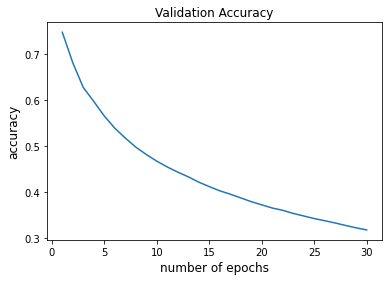

In [75]:
plt.plot(np.arange(30) + 1, loss_vs_time)
plt.title("Validation Accuracy")
plt.xlabel('number of epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)